## 目录
* 词嵌入是什么
* 为什么要进行词嵌入
* 词嵌入方法
* 关于太原局事故文本分析的思考

## 词嵌入是什么
词嵌入是把词/字转化成词/字向量，使得在空间中类似的词的向量离得更近。
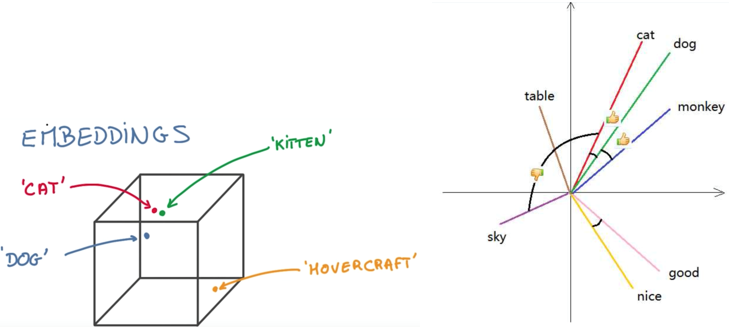

## 为什么要进行词嵌入
**文字数据表达成文字one-hot向量过于稀疏，不利于数学运算，且文字向量无法表示文字间关系**，因此，在训练统计模型时我们通常寻求更多文字转换的数据。  
例如：某篇文章中出现了猫咪和猫猫两个词，使用one-hot向量表示这两个词如下：  

“猫咪”表示为 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 …]  
“猫猫”表示为 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 …]

这种 One-hot Representatio存在一个重要的问题就是**“词汇鸿沟”**现象：任意两个词之间都是孤立的。从这两个向量中看不出猫咪和猫猫是否有关系，即使它们是同义词。



## 词嵌入方法
词嵌入可以通过矩阵分解、聚类、神经网络实现。所有算法都是通过字词与上下文的关系计算词的分布式表达向量的。**本节重点在于神经网络的Word2Vec分布表示**，其他方法略过。

### （一）基于矩阵的分布表示［代表算法：LSA、GloVe］  
这类方法需要构建一个“词-上下文”矩阵,从矩阵中获取词的表示。在“词-上下文”矩阵中,每行对应一个词,每列表示一种不同的上下文,矩阵中的每个元素对应相关词和上下文的共现次数。在这种表示下,矩阵中的一行,就成为了对应词的表示,这种表示描述了该词的上下文的分布。由于分布假说认为上 下文相似的词,其语义也相似,因此在这种表示下,两个词的语义相似度可以直接转化为两个向量的空间距离。这类方法具体可以分为3个步骤:

1. 选取上下文 
最常见的有三种方法：第一种,将词所在的文档作为上下文，形成“词-文档”矩阵；第二种，将词附近上下文中的各个词(如上下文窗口中的5个词)作为上下文，形成“词-词”矩阵；第三种，将词附近上下文各词组成的n元词组(n-gram)作为上下文。

2. 确定矩阵中各元素的值 
“词-上下文”共现矩阵根据其定义,里面各元素的值应为词与对应的上下文的共现次数。然而直接使用原始共现次数作为矩阵的值在大多数情况下效果并不好,因此研究人员提出了多种加权和平滑方法,最常用的有 tf-idf、PMI 和直接取log。

3. 矩阵分解(可选) 
在原始的“词-上下文”矩阵中,每个词表示为一个非常高维(维度是不同上下文的总个数)且非常稀疏的向量,使用降维技术可以将这一高维稀疏向量压缩成低维稠密向量。降维技术可以减少噪声带来的影响, 但也可能损失一部分信息。最常用的分解技术包括奇异值分解(SVD)、非负矩阵分解(NMF)等。



### （二） 基于聚类的分布表示［代表算法：Brown clustering］  
这类方法通过聚类手段构建词与其上下文之间的关系，代表算法为Brown clustering。Brown clustering是一种层级聚类方法，聚类结果为每个词的多层类别体系，因此可以根据两个词的公共类别判断其语义相似度。具体地，布朗聚类需要最大化以下似然函数：P(wi|wi−1) = P (wi|ci)P (ci|ci−1)，其中ci为词wi对应的类别。



### （三） 基于神经网络的分布表示［代表算法：Word2Vec、RNNLM］
Word2vec词嵌入法通过CBOW或Skip-gram模型实现。这两种方法都是浅层神经网络，训练效果差别不大。
* CBOW模型根据中心词W(t)周围的词来预测中心词
* Skip-gram模型则根据中心词W(t)来预测周围词

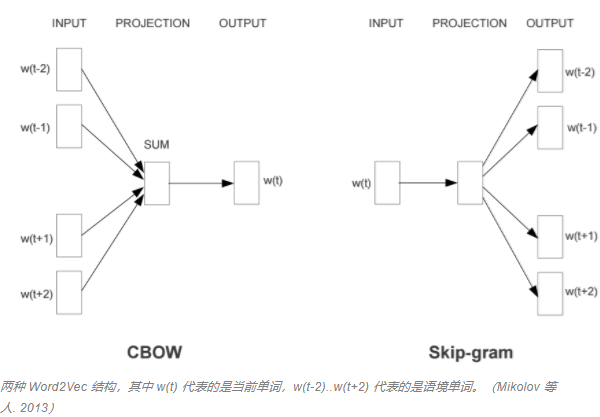

### CBOW（ Continuous Bagof-Words）

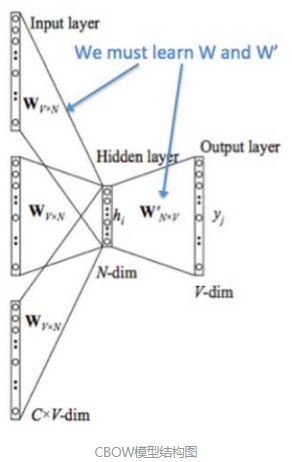
从以上结果图可以总结出CBOW模型计算过程：

（1）输入层：上下文单词的onehot向量.  {V表示单词空间维度，N表示单词位置，C表示上下文单词个数}  
（2）分别用每个词的onehot向量乘以第一层初始权重矩阵W   
（3）将（2）所得的向量相加并求平均，并乘以第二层初始权重矩阵W'作为激活函数的输入  
（4）使用softmax激活函数计算出predicted label，与true label的onehot做比较，如果误差大，则使用梯度下降更新W和W'

训练完毕后，输入层的每个单词与矩阵W相乘得到的向量的就是我们想要的词向量（word embedding），这个矩阵（所有单词的word embedding）也叫做look up table。

### CBOW模型示例

假设我们现在的Corpus是这一个简单的只有四个单词的document：{I drink coffee everyday}我们选coffee作为中心词，window size设为2也就是说，我们要根据单词"I","drink"和"everyday"来预测一个单词，并且我们希望这个单词是coffee。
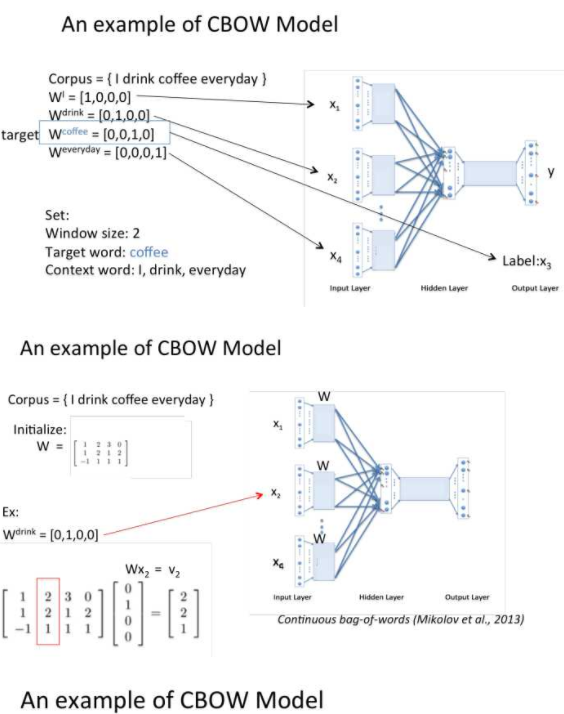

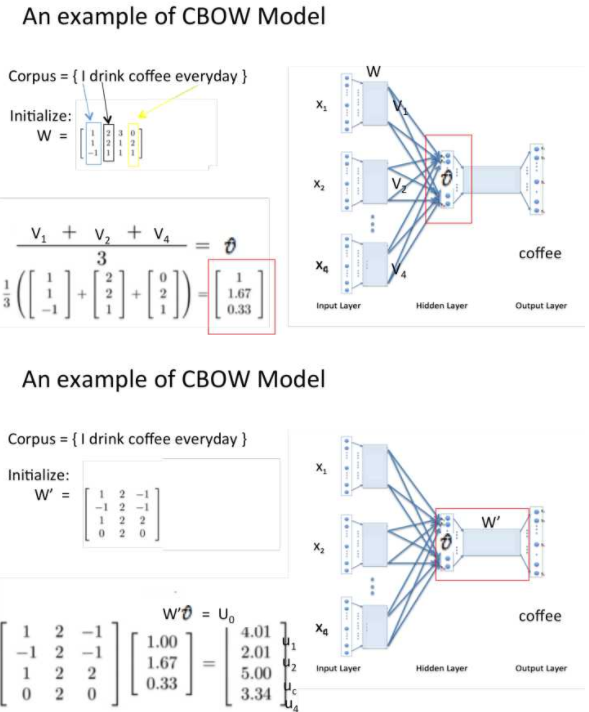

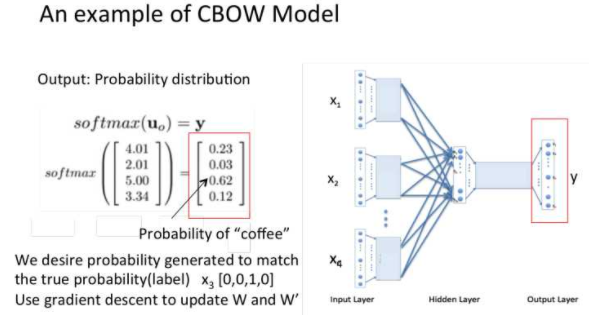

训练完成后，任何一个单词的one-hot表示乘以这个矩阵都将得到自己的word embedding，比如：
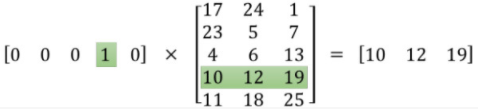

## skip-gram
Skip-gram模型根据中心词W(t)来预测周围词，其神经网络训练方法与CBOW模型一致。下图为Skip-gram模型示例，ant是中心词，词汇量是10000个。模型输入是ant的onehot向量，隐藏层有300个神经元，输出层神经元结点为每个词出现在ant周围的概率，所有输出层神经元结点的概率之和为1。

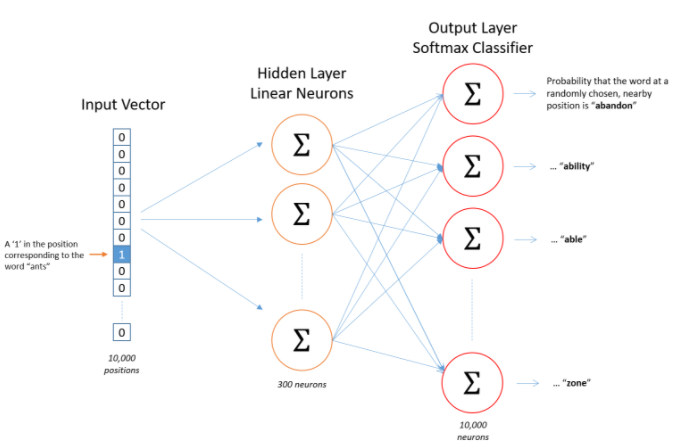


# 关于太原局事故文本分析的思考
在ChineseNER模型中我们使用的word-embedding是通过中文维基百科训练得来字嵌入，属于普适性的word embedding。而太原局事故文本项目中的关键字词属于专业领域的知识，普适性的word embedding无法准确训练出铁路专业字词之前的关系。可以尝试利用事故文本自行训练专业领域的字嵌入，为专业词典中出现字训练字嵌入，其他字的表征向量可从普适性的word embedding中抽取。

# 参考文献
https://classroom.udacity.com/courses/ud730/lessons/6378983156/concepts/64194197210923  
https://www.jianshu.com/p/ec27062bd453  
http://blog.idejie.com/2017/07/15/word-embedding/   
https://www.zhihu.com/question/44832436/answer/266068967  